# Lecture 08

Examples of examining systems of nonlinear equations and bifurcations

In [1]:
import numpy as np

import sympy
from sympy import simplify, Function
from sympy import symbols, pprint
from sympy import sin, cos, asin, acos, pi, Abs
from sympy import Matrix, diff
from sympy import lambdify

from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
plt.ion()


## Bifurcation in the pendulum with constant torque

In [2]:
gravity = 9.8

# General inverted pendulum simulator
def pendulum(t, state, l, torque):
    theta, omega = state 
    dydt = [omega, (gravity/l)*(-np.sin(theta) + torque)]
    return dydt

In [4]:
def deg2rad(deg):
    return deg*np.pi/180

## Define the initial conditions


In [5]:
# System constants
L = 1 
gravity = 9.8

# Initial condition
theta = deg2rad(20)
dtheta_dt = .1

dt = 0.001
time = np.linspace(0,10,int(10/dt))

Solve dynamics for the initial conditions and plot

Text(0.5, 0, 'time')

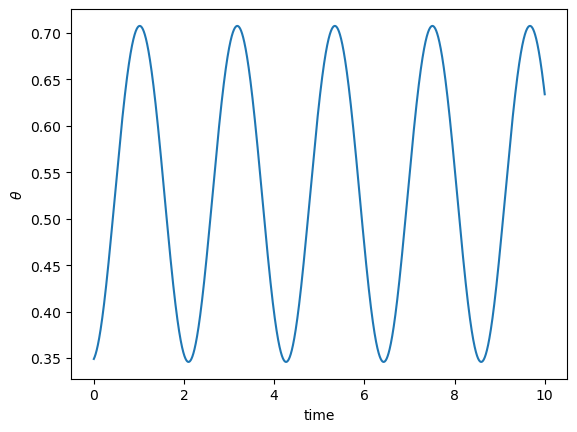

In [7]:
torque = .5

sol = solve_ivp(lambda t, y: pendulum(t, y, L, torque), 
                [0,10], [theta, dtheta_dt], 
                t_eval = time, 
                rtol=1e-8, atol = 1e-8)
plt.figure(1)
plt.clf()
plt.plot(sol.t, sol.y[0,:])
plt.ylabel('$\\theta$')
plt.xlabel('time')

## Plot the phase space and a solution in phase-space

(-3.141592653589793, 3.141592653589793, -3.141592653589793, 3.141592653589793)

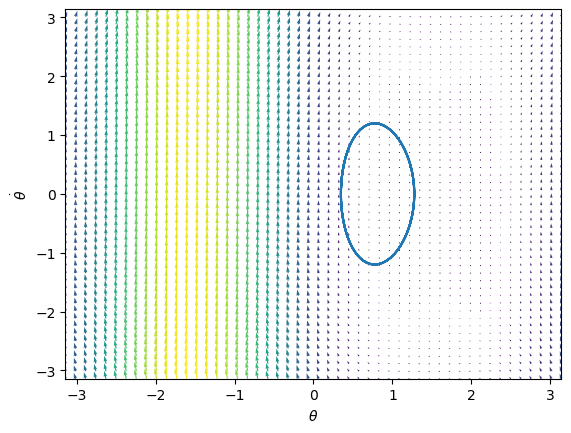

In [73]:
numpoints = 50
rng = np.pi

[x1_vf, x2_vf] = np.meshgrid(np.linspace(-rng,rng,numpoints), 
                             np.linspace(-rng,rng,numpoints)) 

torque = .9
dynamics = pendulum(0, [x1_vf, x2_vf], L, torque)
norm = dynamics[0]**2 + dynamics[1]**2

plt.figure(2)
plt.clf()
plt.quiver(x1_vf, x2_vf, dynamics[0], dynamics[1], norm)

plt.plot(sol.y[0,:], sol.y[1,:])

plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.axis([-rng, rng, -rng, rng])


## Plot a bunch of solutions

(-10.0, 10.0, -7.5, 7.5)

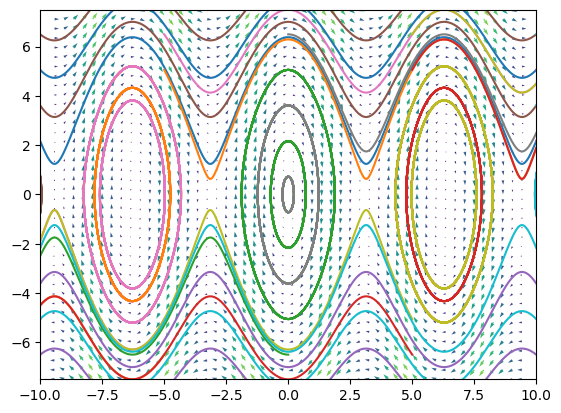

In [8]:
theta = np.linspace(-10, 10, 5)
dtheta_dt = np.linspace(-6.5, 6.5, 10)
[theta_start, dtheta_start] = np.meshgrid(theta, 
                                          dtheta_dt) 

#### Plot vector field
plt.figure(1)
plt.clf()

numpoints = 50
rng = 3*np.pi

[x1_vf, x2_vf] = np.meshgrid(np.linspace(-rng,rng,numpoints), 
                             np.linspace(-rng,rng,numpoints)) 

dynamics = pendulum(0, [x1_vf, x2_vf], L)
norm = dynamics[0]**2 + dynamics[1]**2
plt.quiver(x1_vf, x2_vf, dynamics[0], dynamics[1], norm)


for init in zip(theta_start.reshape(1,50)[0], dtheta_start.reshape(1,50)[0]):
    # print(init)
    sol = solve_ivp(lambda t, y: pendulum(t, y, L), 
                    [0,10], init, 
                    t_eval = time, 
                    rtol=1e-8, atol = 1e-8)
    plt.plot(sol.y[0,:], sol.y[1,:])

plt.axis([-10, 10, -7.5, 7.5])    

# Simulating the Van der Pol system

In [24]:
# General inverted pendulum simulator
def vdp(t, state, epsilon):
    x, v = state
    dydt = [v, -x + epsilon*(1 - x**2)*v]
    return dydt

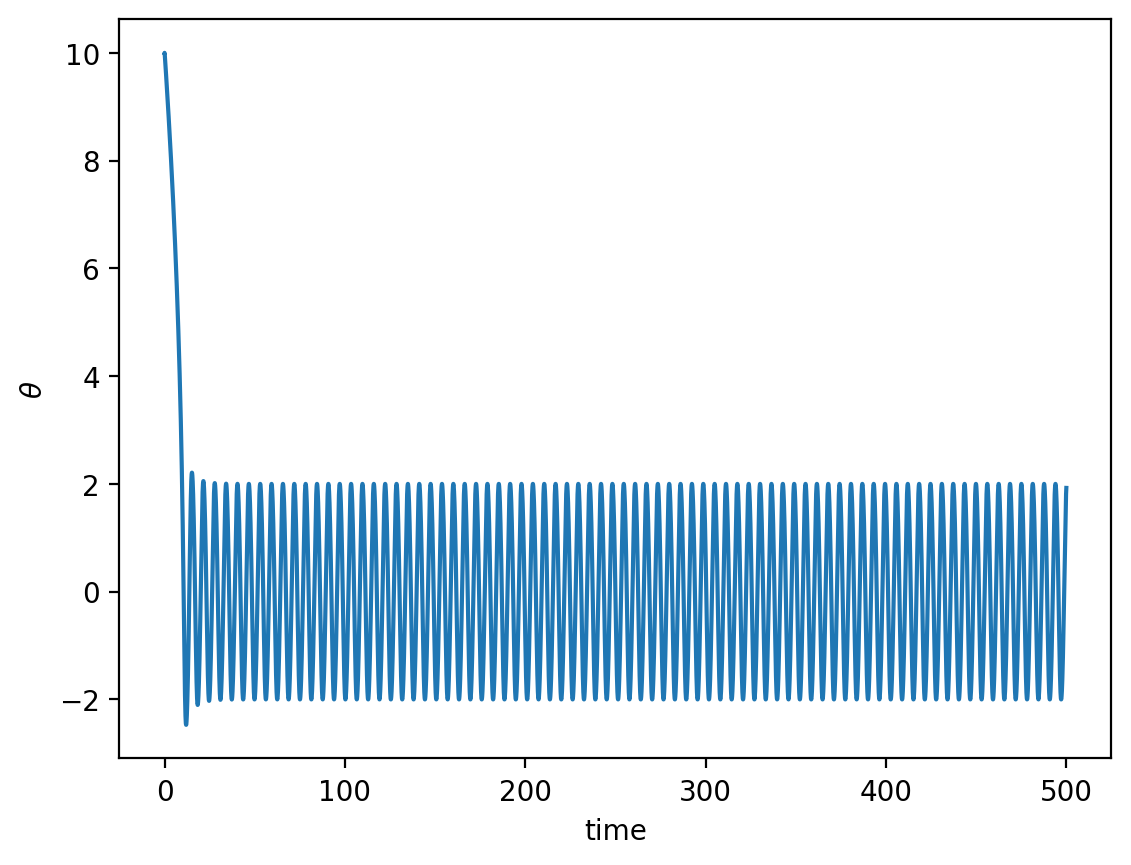

In [34]:
# System constants
epsilon = .2

# Initial condition
x_0 = 10
v_0 = np.random.rand(1)[0] #0.01

dt = 0.001
t_end = 500
time = np.linspace(0,t_end,int(t_end/dt))

sol = solve_ivp(lambda t, y: vdp(t, y, epsilon), 
                [0,t_end], [x_0, v_0], 
                t_eval = time, 
                rtol=1e-8, atol = 1e-8)
plt.figure(1)
plt.clf()
plt.plot(sol.t, sol.y[0,:])
plt.ylabel('$\\theta$')
plt.xlabel('time')
plt.gcf()

(-5.0, 5.0, -5.0, 5.0)

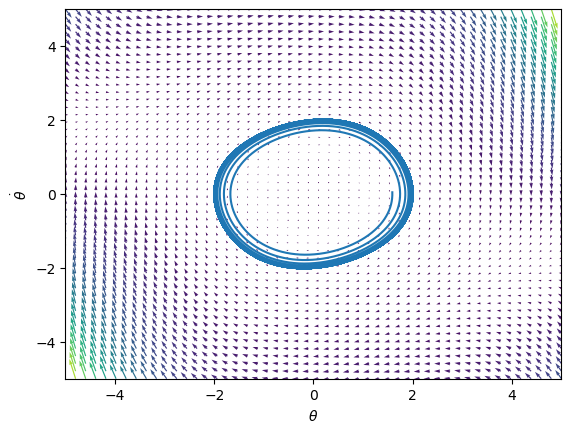

In [15]:
numpoints = 50
rng = 5

[x1_vf, x2_vf] = np.meshgrid(np.linspace(-rng,rng,numpoints), 
                             np.linspace(-rng,rng,numpoints)) 

dynamics = vdp(0, [x1_vf, x2_vf], epsilon)
norm = dynamics[0]**2 + dynamics[1]**2

plt.figure(2)
plt.clf()
plt.quiver(x1_vf, x2_vf, dynamics[0], dynamics[1], norm)

plt.plot(sol.y[0,:], sol.y[1,:])

plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.axis([-rng, rng, -rng, rng])


In [16]:
%matplotlib qt

numpoints = 30
rng = 4

[x1_vf, x2_vf] = np.meshgrid(np.linspace(-rng,rng,numpoints), 
                             np.linspace(-rng,rng,numpoints)) 

epsilon = 0.2

dynamics = vdp(0, [x1_vf, x2_vf], epsilon)
norm = dynamics[0]**2 + dynamics[1]**2

plt.figure(2)
plt.clf()
plt.quiver(x1_vf, x2_vf, dynamics[0], dynamics[1], norm)

plt.plot(sol.y[0,:], sol.y[1,:])

plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.axis([-rng, rng, -rng, rng])

### Select our point
location = plt.ginput(1)

while len(location) > 0:
    location = location[0]
    plt.plot(location[0], location[1], 'ro')
    plt.pause(0.01);
    
    sol = solve_ivp(lambda t, y: vdp(t, y, epsilon), 
                    [0,t_end], [location[0], location[1]], 
                    t_eval = time, 
                    rtol=1e-8, atol = 1e-8)
    
    plt.plot(sol.y[0,:], sol.y[1,:])
    plt.pause(0.01)
    location = plt.ginput(1)





KeyboardInterrupt: 

## Creating the return map for the Van der Pol oscillator

We can use the "events" feature in solve_ivp to keep track of every time an event occurs. 
This could be for instance when the trajectory crosses a specific boundary. 

In [17]:
def Poincare_event(t, state):
    x, y = state
    return y
    
Poincare_event.terminal = False
Poincare_event.direction = -1

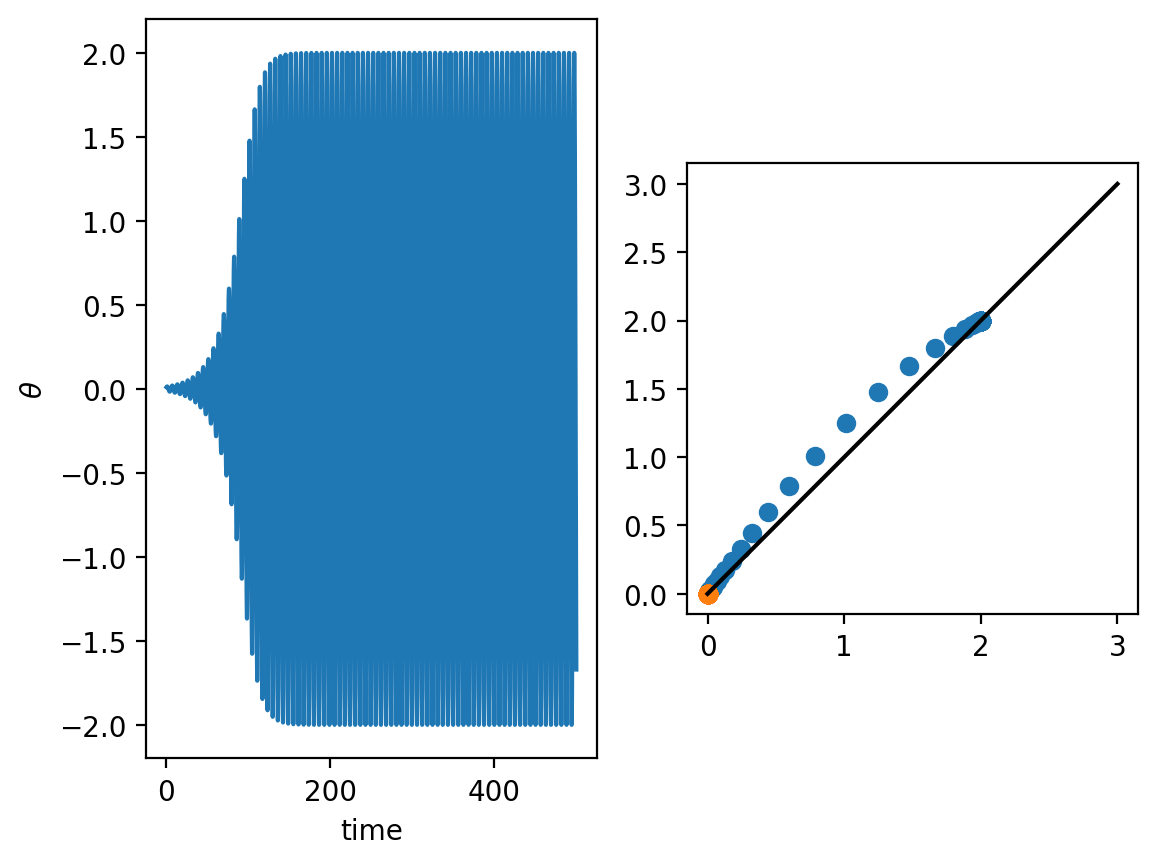

In [18]:
# System constants
epsilon = .1

# Initial condition
x_0 = 0.01
v_0 = 0.01

dt = 0.001
t_end = 500
time = np.linspace(0,t_end,int(t_end/dt))

sol = solve_ivp(lambda t, y: vdp(t, y, epsilon), 
                [0,t_end], [x_0, v_0], 
                t_eval = time, 
                events = Poincare_event,
                rtol=1e-8, atol = 1e-8)


P_events = sol.y_events[0]

plt.figure(1)
plt.clf()
plt.subplot(1,2,1);
plt.plot(sol.t, sol.y[0,:])
plt.ylabel('$\\theta$')
plt.xlabel('time')

plt.subplot(1,2,2);

plt.plot(P_events[:-2], P_events[1:-1],'o')
plt.plot([0,3], [0, 3], 'k-')
plt.gca().set_aspect('equal', 'box')
plt.gcf()


## Run many simulations from different initial conditions

In [19]:
# System constants
epsilon = .1

# Initial condition

dt = 0.001
t_end = 200
time = np.linspace(0,t_end,int(t_end/dt))
plt.figure(1)
plt.clf()

for kk in range(10):
    x_0 = 3*np.random.rand(1)[0]
    v_0 = 3*np.random.rand(1)[0]
    
    sol = solve_ivp(lambda t, y: vdp(t, y, epsilon), 
                    [0,t_end], [x_0, v_0], 
                    t_eval = time, 
                    events = Poincare_event,
                    rtol=1e-8, atol = 1e-8)


    P_events = sol.y_events[0]
    
    
    plt.subplot(1,2,1);
    plt.plot(sol.t, sol.y[0,:])
    plt.ylabel('$\\theta$')
    plt.xlabel('time')

    plt.subplot(1,2,2);
    plt.plot(P_events[:-2], P_events[1:-1],'o')
    plt.plot([0,3], [0, 3], 'k-')
    plt.gca().set_aspect('equal', 'box')
    plt.gcf()





# An exactly solvable return map

Consider the following system.

$\begin{array}{l}
\dot{x}_1=\left(\mu-\left(x_1^2+x_2^2\right)\right) x_1+\omega x_2 \\
\dot{x}_2=\left(\mu-\left(x_1^2+x_2^2\right)\right) x_2-\omega x_1
\end{array}$

Converting to polar coordinates turns this system into 
$\begin{array}{l}
\dot{r}= (\mu - r^2) r \\
\dot{\theta}= -\omega
\end{array}$

Which we can solve for the exact return map as 
$
P(r) = \sqrt{1 + e^{-4 \pi} (r^{-2} - 1)}
$

In [3]:
def Poincare_event2(t, state):
    x1, x2 = state
    return x2
    
Poincare_event2.terminal = False
Poincare_event2.direction = -1

def dynamics_fun(t, state, mu, omega, eps):
    x1, x2 = state
    dydt = [eps*(mu - (x1**2 + x2**2))*x1 + omega*x2, 
            eps*(mu - (x1**2 + x2**2))*x2 - omega*x1, ]
    return dydt

In [45]:
numpoints = 30
rng = 300

[x1_vf, x2_vf] = np.meshgrid(np.linspace(-rng,rng,numpoints), 
                             np.linspace(-rng,rng,numpoints)) 

mu = 1
omega = 1
eps = -.001
t_end = 100

######### Plot the vector field
dynamics = dynamics_fun(0, [x1_vf, x2_vf], mu, omega, eps)
norm = dynamics[0]**2 + dynamics[1]**2

plt.figure(2)
plt.clf()
plt.quiver(x1_vf, x2_vf, dynamics[0], dynamics[1], norm)

######### Solve for dynamics
x_0 = 3*np.random.rand(1)[0]
v_0 = 3*np.random.rand(1)[0]
sol = solve_ivp(lambda t, y: dynamics_fun(t, y, mu, omega, eps), 
                [0,t_end], [x_0, v_0],  
                events = Poincare_event2,
                rtol=1e-8, atol = 1e-8)


plt.plot(sol.y[0,:], sol.y[1,:])

plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.axis([-rng, rng, -rng, rng])

plt.figure(1)
plt.clf()
P_events = sol.y_events[0]


plt.subplot(1,2,1);
plt.plot(sol.t, sol.y[0,:])
plt.ylabel('$\\theta$')
plt.xlabel('time')

plt.subplot(1,2,2);
plt.plot(P_events[:-2], P_events[1:-1],'o')
plt.plot([0,3], [0, 3], 'k-')
plt.gca().set_aspect('equal', 'box')
plt.gcf()


<Figure size 745x534 with 2 Axes>

In [28]:
plt.figure(1)
plt.clf()

mu = 2
omega = 10
epsilon = -.01
t_end = 300

p_events_all = []

for kk in range(1):
    x_0 = 20*np.random.rand(1)[0]
    v_0 = 20*np.random.rand(1)[0]

    sol = solve_ivp(lambda t, y: dynamics_fun(t, y, mu, omega, epsilon), 
                    [0,t_end], [x_0, v_0], 
                    events = Poincare_event2,
                    rtol=1e-8, atol = 1e-8)

    P_events = sol.y_events[0]
    
    p_events_all.append(P_events)

    plt.subplot(1,2,1);
    plt.plot(sol.t, sol.y[0,:])
    plt.ylabel('$\\theta$')
    plt.xlabel('time')

    plt.subplot(1,2,2);
    plt.plot(P_events[:-2], P_events[1:-1],'ko')
    plt.plot([0,3], [0, 3], 'k-')
    plt.gca().set_aspect('equal', 'box')
    plt.gcf()
    plt.pause(0.01)
    

tt = np.linspace(0,10,100)


plt.plot(tt, np.sqrt(mu / (1 - np.exp(-4*np.pi*mu*epsilon/omega)*(1 - mu/tt**2)**(1))))


In [19]:
tt = np.linspace(0,10,100)


plt.plot(tt, np.sqrt(mu / (1 - np.exp(-4*np.pi*mu*epsilon/omega)*(1 - mu/tt**2)**(1))))


In [29]:
sol

  message: 'Required step size is less than spacing between numbers.'
     nfev: 2138
     njev: 0
      nlu: 0
      sol: None
   status: -1
  success: False
        t: array([0.        , 0.00275972, 0.0119236 , 0.02130156, 0.03073406,
       0.04024284, 0.04986626, 0.05964078, 0.06954591, 0.07943094,
       0.08900467, 0.09804434, 0.10649667, 0.11436141, 0.12068612,
       0.12621537, 0.13104616, 0.13528584, 0.13902321, 0.14232836,
       0.14525657, 0.14785199, 0.15015044, 0.15218124, 0.15396815,
       0.15552932, 0.15687565, 0.15822198, 0.15951575, 0.16079349,
       0.1620328 , 0.16321805, 0.16433995, 0.16539371, 0.16637759,
       0.16729201, 0.16813879, 0.16892065, 0.16964091, 0.17030316,
       0.17091113, 0.17146855, 0.17197908, 0.17244625, 0.1728734 ,
       0.17326372, 0.17362017, 0.17394555, 0.17424244, 0.17451323,
       0.17476014, 0.17498521, 0.17519032, 0.17537721, 0.17554746,
       0.17570252, 0.17584373, 0.17597232, 0.17608938, 0.17619595,
       0.17629296, 0.17638

In [34]:
yy=p_events_all[0]

In [36]:
yy[:,0]

array([49.27835949])

In [35]:
plt.plot(yy[:,0], 'o-')

In [31]:
plt.clf()
plt.semilogy(np.abs(yy[:,0] - yy[-1,0]), 'o-')

## Let's make each solution stop and restart at the event

In [15]:
def Poincare_event2(t, state):
    x1, x2 = state
    return x2
    

##### Now set stopping to True!
Poincare_event2.terminal = True
Poincare_event2.direction = -1



In [19]:
plt.figure(1)
plt.clf()

mu = 2
omega = 1
epsilon = .1
t_end = 300

######## Let's plot the vector field
plt.subplot(1,3,1);
dynamics = dynamics_fun(0, [x1_vf, x2_vf], mu, omega, eps)
norm = dynamics[0]**2 + dynamics[1]**2
plt.quiver(x1_vf, x2_vf, dynamics[0], dynamics[1], norm)


x_0 = .2*np.random.rand(1)[0]
v_0 = .2*np.random.rand(1)[0]

sol = solve_ivp(lambda t, y: dynamics_fun(t, y, mu, omega, epsilon), 
                [0,t_end], [x_0, v_0], 
                t_eval = time, 
                events = Poincare_event2,
                rtol=1e-8, atol = 1e-8)

P_events_new = sol.y_events[0]


for kk in range(10):
    P_events_old = P_events_new
    x_0 = sol.y[0,-1] 
    v_0 = sol.y[1,-1]
    
    sol = solve_ivp(lambda t, y: dynamics_fun(t, y, mu, omega, epsilon), 
                    [0,t_end], [x_0, v_0], 
                    t_eval = time, 
                    events = Poincare_event2,
                    rtol=1e-8, atol = 1e-8)


    
    P_events_new = sol.y_events[0]

    plt.subplot(1,3,1);
    plt.plot(sol.y[0,:], sol.y[1,:])    
    
    plt.subplot(1,3,2);
    plt.plot(sol.t, sol.y[0,:])
    plt.ylabel('$\\theta$')
    plt.xlabel('time')

    plt.subplot(1,3,3);
    plt.plot(P_events_old, P_events_new,'ko')
    plt.plot([0,3], [0, 3], 'k-')
    plt.gca().set_aspect('equal', 'box')
    plt.gcf()
    plt.pause(0.01)
    

tt = np.linspace(0,2,100)


plt.plot(tt, np.sqrt(mu / (1 - np.exp(-4*np.pi*mu*epsilon/omega)*(1 - mu/tt**2)**(1))))
